In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
from ydata_profiling import ProfileReport
import ipywidgets

/var/folders/fs/tjddsjl56hz4qgqkl9pt5h000000gn/T/ipykernel_17420/4183609966.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Load the Dataset

In [2]:
df = pd.read_csv('/Users/debdeepsanyal/Downloads/Cuisine_rating.csv')
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [12]:
print("Here are some basic information about the dataset ")
print('################# SHAPE ##################')
print(df.shape)
print('################# COLUMN NAMES ##################')
print(df.info())
print('################# TYPE ##################')
print(df.dtypes)
print('################# HEAD ##################')
print(df.head())
print('################# NA ##################')
print(df.isnull().sum())
print('################# QUANTILES ##################')
print(df.describe([0,0.05,0.50,0.75,0.90,0.95,0.99,1]).T)

Here are some basic information about the dataset 
################# SHAPE ##################
(200, 15)
################# COLUMN NAMES ##################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [14]:
columns = ['User ID','Area code', 'YOB', 'Budget', 'Food Rating', 'Service Rating', 'Overall Rating']
for col in columns:
    print(df[col].value_counts().to_frame())

         count
User ID       
1            1
138          1
128          1
129          1
130          1
...        ...
70           1
71           1
72           1
73           1
200          1

[200 rows x 1 columns]
           count
Area code       
123           24
129           17
153           15
107           15
154           14
...          ...
120            1
199            1
102            1
106            1
160            1

[65 rows x 1 columns]
      count
YOB        
1974     12
2006     10
2000     10
2001      8
1998      8
1995      6
1977      6
2002      6
1969      6
2007      6
1956      6
2003      6
2009      6
1989      4
1976      4
2005      4
1981      4
1962      4
1964      4
1955      4
1996      4
1961      4
1985      4
1987      4
1975      4
1999      4
1988      4
1971      4
1959      4
1991      4
1965      4
1963      4
1990      2
1960      2
1978      2
1979      2
1994      2
1957      2
2004      2
1980      2
1997      2
1958      2
1983     

In [15]:
profile = ProfileReport(df, title = "Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

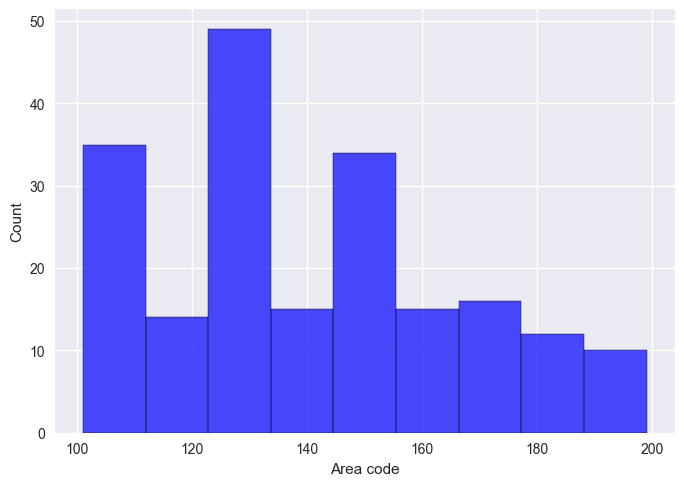

In [5]:

sns.histplot(data= df, x = df['Area code'], alpha  = 0.7, color='blue')
plt.show()

In [45]:
dic = dict({})
col = df['Area code']
max = -1
for i in col:
    dic[i] = dic.get(i) + 1 if i in dic else 1

s =""

for items in dic:
    if(dic.get(items)>max):
        max = dic.get(items)
        s = items
print(max)
print(s)

#place from where the maximum number of people visit

24
123


Here, we are going to segregate categorical, numerical and cardinal variables for a more clarified data analysis. Categorical values might need one hot encoding if being used in an ML algo. Numerical values might require scaling/standardization to make them usable. Cardinal values usually have a high number of unique values and might require dimensionality reduction algorithms. Segregating them is highly convenient from an visualization point of view as well, such as we can use histograms and scatter plots for numeric values, bar charts for categorical variables and special techniques for cardinal variables.

In [34]:
def grab_col_names(df):
    for col in df.columns:
        if df[col].dtypes == 'bool':
            df[col] = df[col].astype(int)
    cat_cols = [col for col in df.columns if df[col].dtypes in ["category","object","bool"]]
    num_but_cat = [col for col in df.columns if df[col].nunique()<10 and df[col].dtypes in ["int","float"]]
    cat_but_car = [col for col in df.columns if df[col].nunique()>20 and df[col].dtypes in ["category","object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations : {df.shape[0]}")
    print(f"Variables : {df.shape[1]}")
    print(f"Categorical Columns : {len(cat_cols)}")
    print(f"Numerical Columns : {len(num_cols)}")
    print(f"Categorical but Cardinal Columns : {len(cat_but_car)}")
    print(f"Numerical but Categorical Columns : {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

In [35]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print(cat_cols)

Observations : 200
Variables : 15
Categorical Columns : 12
Numerical Columns : 3
Categorical but Cardinal Columns : 0
Numerical but Categorical Columns : 4
['Location', 'Gender', 'Marital Status', 'Activity', 'Cuisines', 'Alcohol ', 'Smoker', 'Often A S', 'Budget', 'Food Rating', 'Service Rating', 'Overall Rating']


In [38]:
def cat_summary(df, col_name, plot = False):
    print(pd.DataFrame({col_name : df[col_name].value_counts(),
                        "Ratio" : 100*df[col_name].value_counts()/len(df)}))
    print('#######################################')
    if plot:
        sns.countplot(x = df[col_name], data= df)
        plt.show(block= True)

                    Location  Ratio
Location                           
St. George,NY             46   23.0
Upper East Side,NY        30   15.0
Riverdale,NY              28   14.0
Central Park,NY           24   12.0
China Town, NY            22   11.0
Market City, NY           20   10.0
Upper West Side,NY        18    9.0
Central Park,ny            8    4.0
Market City, MY            2    1.0
Cedar Hill, NY             2    1.0
#######################################


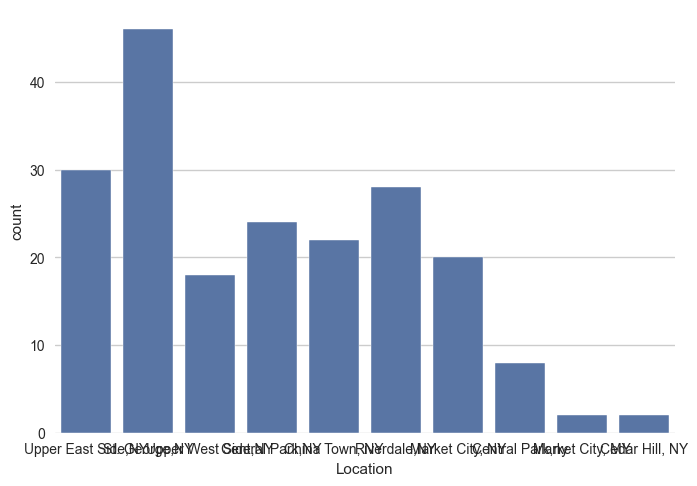

        Gender  Ratio
Gender               
Male       118   59.0
Female      82   41.0
#######################################


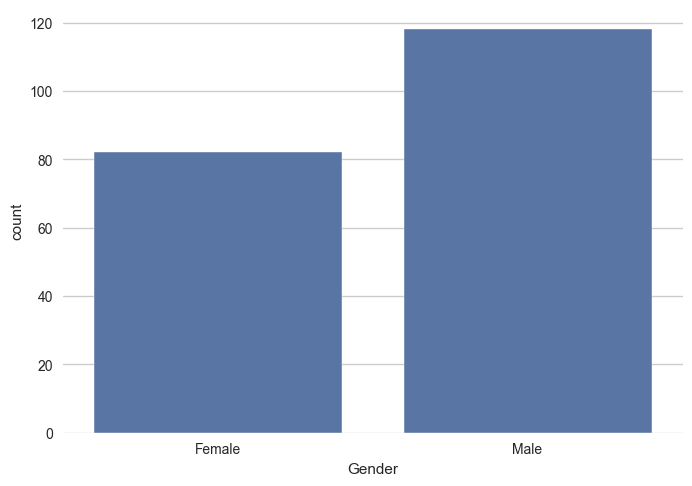

                Marital Status  Ratio
Marital Status                       
Single                     100   50.0
Married                     86   43.0
Divorced                    14    7.0
#######################################


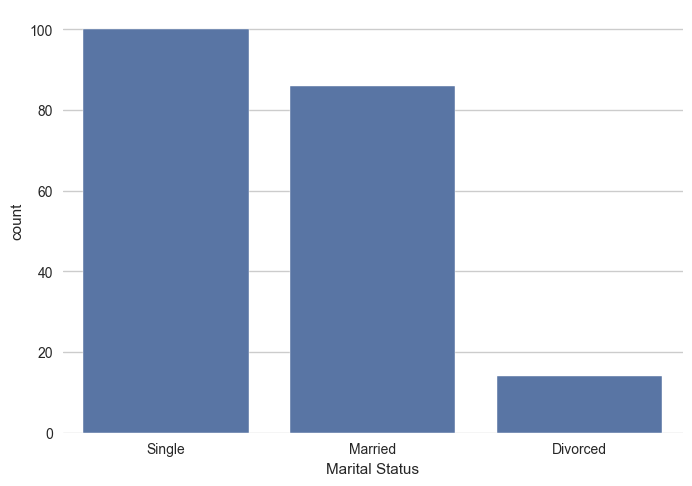

              Activity  Ratio
Activity                     
Student            120   60.0
Professional        80   40.0
#######################################


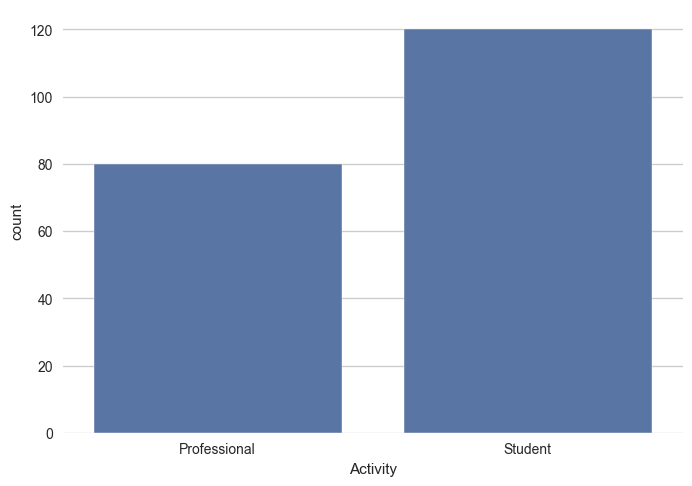

          Cuisines  Ratio
Cuisines                 
Japanese        36   18.0
Filipino        34   17.0
French          34   17.0
Indian          32   16.0
Chinese         24   12.0
Seafood         22   11.0
Italian         18    9.0
#######################################


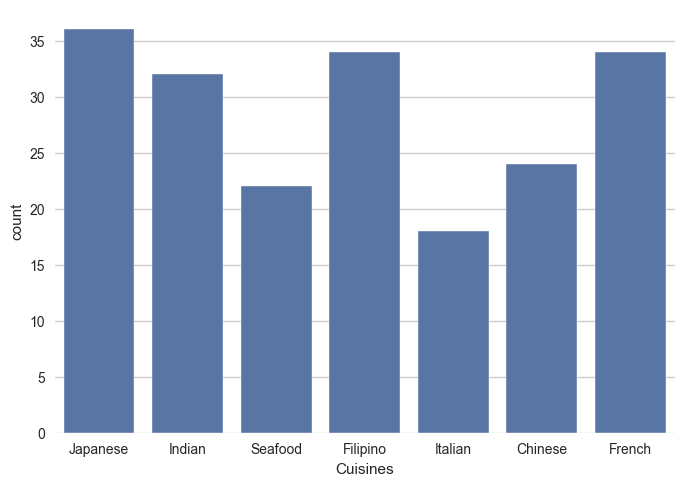

          Alcohol   Ratio
Alcohol                  
Never           88   44.0
Often           61   30.5
Socially        51   25.5
#######################################


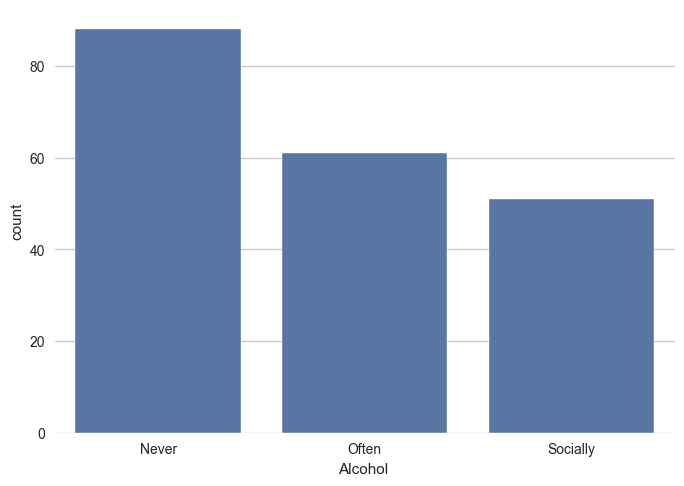

          Smoker  Ratio
Smoker                 
Socially      71   35.5
Often         70   35.0
Never         59   29.5
#######################################


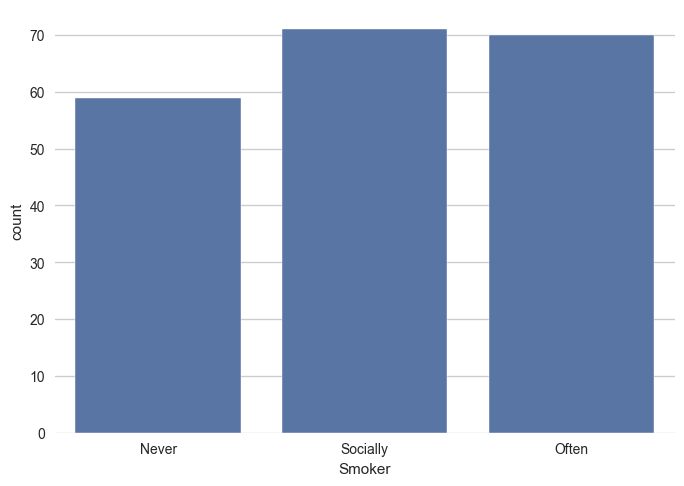

           Often A S  Ratio
Often A S                  
No               174   87.0
Yes               26   13.0
#######################################


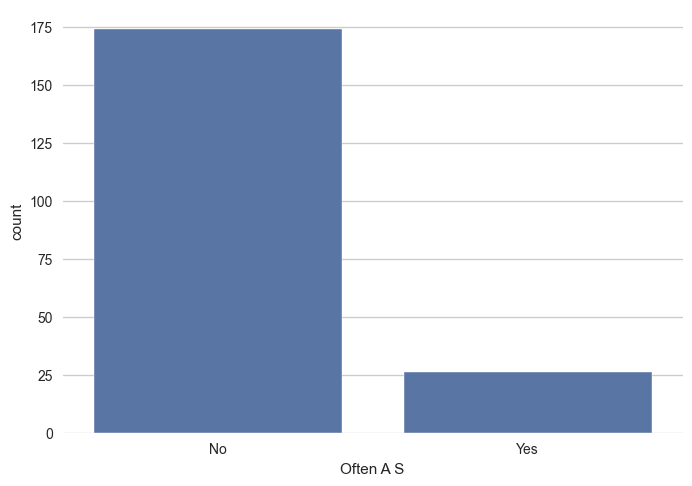

        Budget  Ratio
Budget               
4           63   31.5
5           62   31.0
3           61   30.5
1           10    5.0
2            4    2.0
#######################################


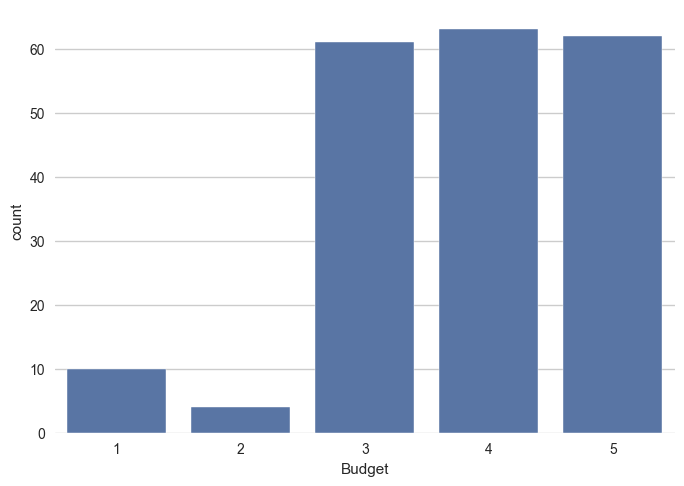

             Food Rating  Ratio
Food Rating                    
5                     53   26.5
3                     46   23.0
2                     35   17.5
4                     35   17.5
1                     31   15.5
#######################################


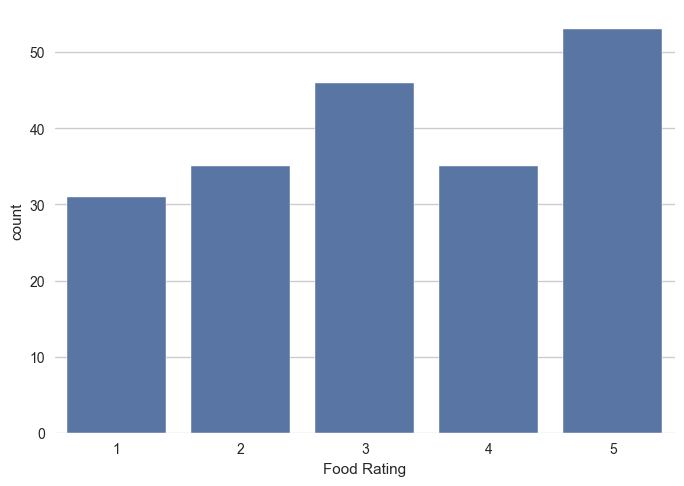

                Service Rating  Ratio
Service Rating                       
5                           66   33.0
2                           43   21.5
1                           35   17.5
3                           29   14.5
4                           27   13.5
#######################################


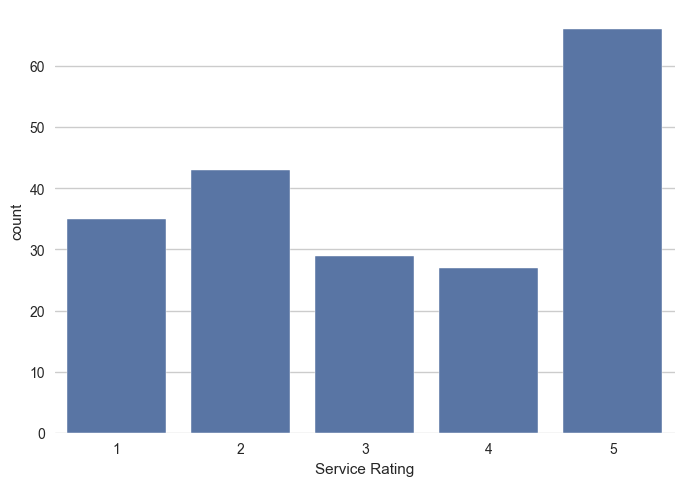

                Overall Rating  Ratio
Overall Rating                       
3.5                         35   17.5
3.0                         34   17.0
2.5                         32   16.0
5.0                         29   14.5
4.0                         26   13.0
2.0                         21   10.5
1.5                         11    5.5
4.5                          6    3.0
1.0                          6    3.0
#######################################


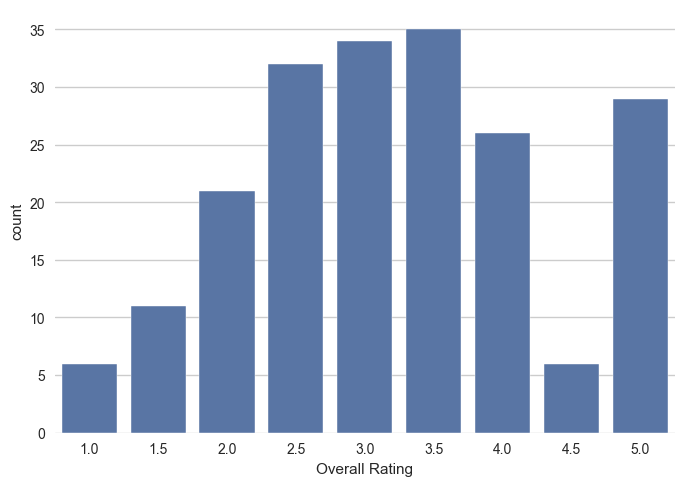

In [39]:
for col in cat_cols:
    cat_summary(df,col,True)

In [41]:
def num_summary(df, num_col, plot = False):
    quantiles = [0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]
    print(df[num_col].describe(quantiles))
    print(df[num_col].value_counts())

    if plot:
        df[num_col].hist()
        plt.xlabel(num_col)
        plt.show(block = True)

count    200.000000
mean     100.500000
std       57.879185
min        1.000000
5%        10.950000
10%       20.900000
25%       50.750000
50%      100.500000
75%      150.250000
90%      180.100000
95%      190.050000
99%      198.010000
max      200.000000
Name: User ID, dtype: float64
User ID
1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: count, Length: 200, dtype: int64


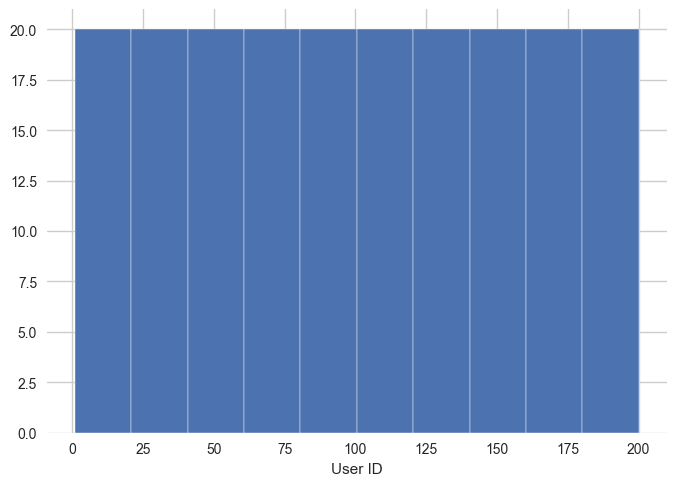

count    200.000000
mean     141.060000
std       26.130257
min      101.000000
5%       107.000000
10%      107.000000
25%      123.000000
50%      135.000000
75%      158.000000
90%      179.300000
95%      188.200000
99%      198.000000
max      199.000000
Name: Area code, dtype: float64
Area code
123    24
129    17
153    15
107    15
154    14
       ..
120     1
199     1
102     1
106     1
160     1
Name: count, Length: 65, dtype: int64


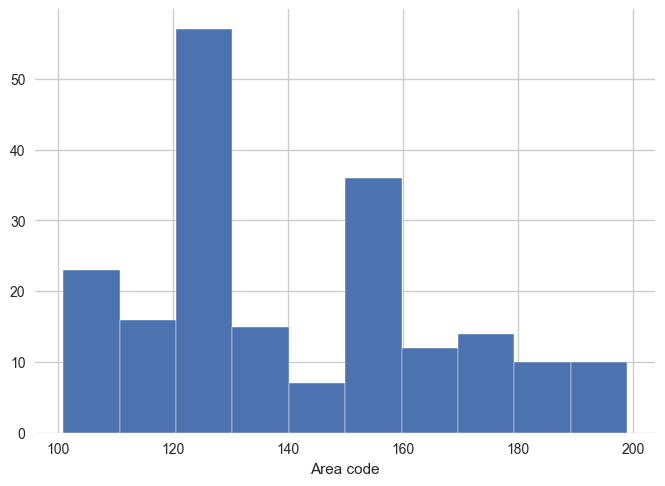

count     200.000000
mean     1984.830000
std        16.809339
min      1955.000000
5%       1956.950000
10%      1960.900000
25%      1971.000000
50%      1987.000000
75%      2000.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2009.000000
Name: YOB, dtype: float64
YOB
1974    12
2006    10
2000    10
2001     8
1998     8
1995     6
1977     6
2002     6
1969     6
2007     6
1956     6
2003     6
2009     6
1989     4
1976     4
2005     4
1981     4
1962     4
1964     4
1955     4
1996     4
1961     4
1985     4
1987     4
1975     4
1999     4
1988     4
1971     4
1959     4
1991     4
1965     4
1963     4
1990     2
1960     2
1978     2
1979     2
1994     2
1957     2
2004     2
1980     2
1997     2
1958     2
1983     2
1967     2
1986     2
1982     2
Name: count, dtype: int64


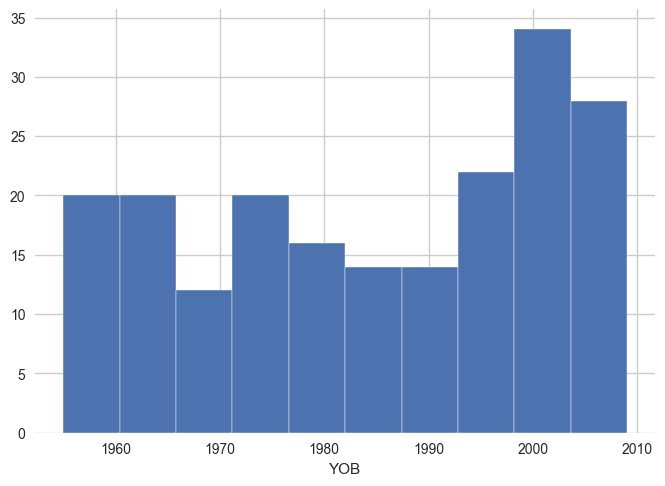

In [42]:
for col in num_cols:
    num_summary(df,col,True)

In [47]:
def target_summary_with_cat(df, target, cat_col):
    print(pd.DataFrame({"Budget Mean" : df.groupby(cat_col)[target].mean()}), end="\n\n\n")


In [48]:
for col in cat_cols:
    target_summary_with_cat(df,"Budget", col)

                    Budget Mean
Location                       
Cedar Hill, NY         4.000000
Central Park,NY        3.333333
Central Park,ny        3.500000
China Town, NY         3.454545
Market City, MY        1.000000
Market City, NY        3.900000
Riverdale,NY           4.285714
St. George,NY          3.978261
Upper East Side,NY     3.866667
Upper West Side,NY     4.000000


        Budget Mean
Gender             
Female     3.963415
Male       3.711864


                Budget Mean
Marital Status             
Divorced           2.571429
Married            3.918605
Single             3.900000


              Budget Mean
Activity                 
Professional        3.875
Student             3.775


          Budget Mean
Cuisines             
Chinese      4.083333
Filipino     3.705882
French       3.941176
Indian       3.406250
Italian      3.888889
Japanese     4.111111
Seafood      3.545455


          Budget Mean
Alcohol              
Never        3.840909
Often        3.622

## Customer Analysis Report

- We get to observe that the restaurant gets to welcome a lot of customers from **_St. George, NY_**, with around _23%_ of the total customers being from that region

- While most of the customers are male, there is'nt a huge disparity between the number of male and female customers visiting the restaurant

- The restaurant gets to observe customers across a wide age group, however, youngsters or people from early 2000's are more frequent, which is a good sign for the restaurant seems to be relevant among the young. 

- The above observation explains why **60%** of the customers are students and **50%** customers are single 

- _Japanese_, _Indian_, _Filipino_ and _French_ are the most in demand cuisines. The restaurant should hence try maintaining and improving the quality of these cuisines while try to introduce more varities in the cuisines which aren't doing as well.

- On an average, customers spend around 3.8 dollars at the restaurant, but most of the customers are'nt regular.

- Customers tend to rate the food _3_ or _5_. The rating percentage of 4stars is quite low, which indicates that the **restaurant can work on the food quality** and shift some of the 3 star ratings to 4 and 5 stars.

- The service rating seems to be okay since most of the customers give a rating of 5, however a concerning observation is that while 33% customers seem to be satisfied with the service, 21.5% of the people have given a rating of 2. The restaurant should seek feedback from customers who are dissatisfied with the service and work to improve those aspects.

- Customers from **_Riverdale, NY_** tend to have the _highest budget_ among all customers. 

- Females tend to spend a bit more than men do, the restaurant could offer some women special offer to attract more female customers 

- *Married couples* tend to have a higher budget and hence, some seasonal offers during specific seasons can be planned to attract more married people 

- _Japanese Cuisine_ fetches the most revenue, closely followed by Chinese Cuisine. Since Japanese cuisine is also the most popular cuisine, a richer menu and special Japanese season offers can attract more customers interested in Japanese cuisine.

- Customers who _consume alcohol in groups_ tend to spend more. Discounts and offers on alcohol servings to a group might be a profitable decision for the restaurant.
